# face detection with mtcnn on a photograph

In [1]:
# load libraries
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [6]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
        # draw the dots on eyes nose ..
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
# draw each face separately

In [7]:
filename = 'img.jpg'
# load image from file
pixels = pyplot.imread(filename)
pixels.shape

(331, 662, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


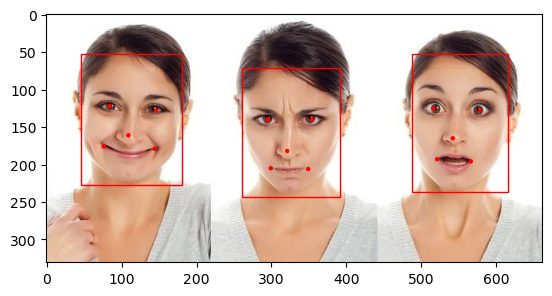

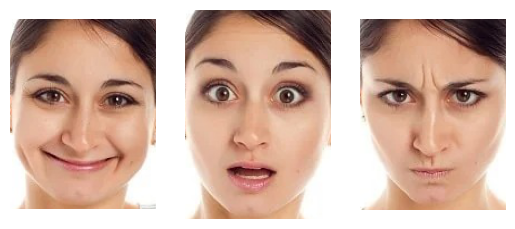

In [10]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces) 
draw_faces(filename, faces)

In [9]:
def draw_faces(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot each face as a subplot
 for i in range(len(result_list)):
  # get coordinates
  x1, y1, width, height = result_list[i]['box']
  x2 , y2 = x1 + width, y1 + height
  # define subplot
  pyplot.subplot(1, len(result_list), i+1)
  pyplot.axis('off')
  # plot face
  pyplot.imshow(data[y1:y2, x1:x2])
 # show the plot
 pyplot.show() 
